In [ ]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Getting Started with the Vertex AI PaLM API & Python SDK

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/language/intro_palm_api.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/language/intro_palm_api.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/blob/main/language/intro_palm_api.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
</table>


## 概要

### LLM とは何ですか?
大規模言語モデル (LLM) は、大量のテキスト データセットでトレーニングされた深層学習モデルです。 LLM は、言語の翻訳、テキストの要約、クリエイティブな文章の生成、コードの生成、チャットボットや仮想アシスタントの強化、検索エンジンや推奨システムの補完を行うことができます。

### PaLM
 [PaLM](https://ai.googleblog.com/2022/04/pathways- language-model-palm-scaling-to.html) に続き、[PaLM 2](https://ai.google/ Discover/palm2) は、機械学習と責任ある AI における画期的な研究という Google の遺産に基づいて構築された、Google の次世代の大規模言語モデルです。 PaLM 2 は、その構築方法により、高度な推論、翻訳、コード生成などのタスクに優れています。

コードと数学、分類と質問応答、翻訳と多言語能力、自然言語生成などの高度な推論タスクで、以前よりも優れています。 PaLM を含む最先端の LLM。 これらのタスクを達成できるのは、コンピューティングに最適なスケーリング、改善されたデータセットの混合、およびモデル アーキテクチャの改善を組み合わせた構築方法のおかげです。

PaLM 2 は、責任を持って AI を構築および導入するための Google のアプローチに基づいています。 研究および製品内アプリケーションにおける潜在的な危害とバイアス、機能、および下流での使用に関して厳密に評価されました。 これは、Med-PaLM 2 や Sec-PaLM などの他の最先端モデルでも使用されており、Bard や PaLM API など、Google の生成 AI 機能やツールを強化しています。

PaLM は、特定のタスクを行わずに、教師なし学習アプローチを使用して、広範囲のテキスト データに対して事前トレーニングされます。 この事前トレーニング プロセス中に、PaLM は、前の単語を考慮して、文内の次の単語を予測する方法を学習します。 これにより、モデルは人間の文章に似た一貫性のある流暢なテキストを生成できます。
この大きなサイズにより、言語の複雑なパターンと関係を学習し、さまざまなアプリケーション向けに高品質のテキストを生成できます。 これが、PaLM のようなモデルが「基礎モデル」と呼ばれる理由です。

LLM の作成には、大量のデータ、大量のコンピューティング リソース、および専門的なスキルが必要です。 LLM の作成には多額の投資が必要なため、特定のユースケースではなく広範なユースケースを対象としています。 Vertex AI では、プロンプト設計とモデル調整を使用して、より具体的なタスクや知識ドメインに合わせて基盤モデルをカスタマイズできます。

### Vertex AI PaLM API の使用

次の方法を使用して Vertex AI PaLM API を操作できます。

* 迅速なテストとコマンド生成には、[Generative AI Studio](https://cloud.google.com/generative-ai-studio) を使用します。
* Cloud Shell で cURL コマンドを使用します。
* Jupyter ノートブックで Python SDK を使用する

このノートブックは、Python SDK を使用して Vertex AI PaLM API を呼び出すことに焦点を当てています。 コードを記述せずに Generative AI Studio を使用する方法の詳細については、[UI の開始手順](https://github.com/GoogleCloudPlatform/generative-ai/blob/main/ language/intro_generative_ai_studio.md) を参照してください。


詳細については、[Vertex AI の生成 AI サポートに関するドキュメント](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/overview) をご覧ください。

### 目的

このチュートリアルでは、Python SDK で PaLM API を使用する方法を学び、そのさまざまなパラメーターを調べます。

このノートブックを最後まで読み終えると、「temperature」、「top_k」、「top_p」などの生成モデル パラメーターのさまざまなニュアンスと、各パラメーターが結果にどのように影響するかを理解できるようになります。

実行される手順は次のとおりです。

- Python SDKのインストール
- Vertex AI PaLM API の使用
   - `text-bison@001`によるテキスト生成モデル
     - モデルパラメータの理解 (「temperature」、「max_output_token」、「top_k」、「top_p」)
   - `chat-bison@001`とのチャットモデル
   - `textembedding-gecko@001` による埋め込みモデル

### コスト
このチュートリアルでは、Google Cloud の課金対象コンポーネントを使用します。

* Vertex AI ジェネレーティブ AI スタジオ

[Vertex AI の料金設定](https://cloud.google.com/vertex-ai/pricing) について確認してください。
[料金計算ツール](https://cloud.google.com/products/calculator/) を使用してください。
予測される使用量に基づいてコストの見積もりを生成します。

### 責任ある AI
大規模言語モデル (LLM) は、言語の翻訳、テキストの要約、クリエイティブな文章の生成、コードの生成、チャットボットや仮想アシスタントの強化、検索エンジンや推奨システムの補完を行うことができます。 同時に、初期段階のテクノロジーとして、その進化する機能と使用法により、誤用、誤用、および意図しないまたは予期しない結果が生じる可能性が生じます。 大規模な言語モデルでは、不快なテキスト、無神経なテキスト、事実に反するテキストなど、予期しない出力が生成される可能性があります。

さらに、LLM の驚くべき多用途性により、LLM がどのような種類の意図しない、または予期しない出力を生成するかを正確に予測することが困難になります。 これらのリスクと複雑さを考慮して、PaLM API は [Google の AI 原則](https://ai.google/principles/) を念頭に置いて設計されています。 ただし、開発者がモデルを理解してテストし、安全かつ責任を持ってデプロイすることが重要です。 開発者を支援するために、Generative AI Studio にはコンテンツ フィルタリングが組み込まれており、PaLM API には安全属性スコアリングがあり、顧客が Google の安全フィルタをテストし、ユースケースやビジネスに適した信頼しきい値を定義できるようにします。 詳細については、[安全フィルターと属性](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/responsible-ai#safety_filters_and_attributes) セクションを参照してください。

PaLM API がお客様固有のユースケースとコンテキストに統合される場合、追加の責任ある AI の考慮事項と [PaLM の制限事項](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/responsible-ai) #palm_limitations) を考慮する必要がある場合があります。 当社では、お客様に対し、公平性、解釈可能性、プライバシー、セキュリティを活用することを推奨しています [推奨慣行](https://ai.google/payments/responsible-ai-practices/)。

## Getting Started

### Install Vertex AI SDK

In [1]:
!pip install google-cloud-aiplatform --upgrade --user

**Colab only:** Uncomment the following cell to restart the kernel or use the button to restart the kernel. For Vertex AI Workbench you can restart the terminal using the button on top.

In [2]:
# # Automatically restart kernel after installs so that your environment can access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

### ノートブック環境の認証
* **Colab** を使用してこのノートブックを実行している場合は、下のセルのコメントを解除して続行してください。
* **Vertex AI Workbench** を使用している場合は、セットアップ手順を [こちら](https://github.com/GoogleCloudPlatform/generative-ai/tree/main/setup-env) で確認してください。

In [1]:
from google.colab import auth
auth.authenticate_user()

## Vertex AI PaLM API models

Vertex AI PaLM API を使用すると、PaLM と呼ばれる Google の大規模言語モデル (LLM) のインスタンスをテスト、カスタマイズ、デプロイできるため、アプリケーションで PaLM の機能を活用できます。

### モデルの命名スキーム
ファウンデーション モデル名には、ユース ケース、モデル サイズ、バージョン番号という 3 つの要素があります。 命名規則は次の形式になります。
`<ユースケース>-<モデルサイズ>@<バージョン番号>`

たとえば、text-bison@001 は Bison テキスト モデル、バージョン 001 を表します。

モデルのサイズは次のとおりです。
- **Bison**: 機能とコストの点で最高の価値があります。
- **Gecko**: 単純なタスク向けの最小かつ安価なモデル。

### 利用可能なモデル

Vertex AI PaLM API は現在、次の 5 つのモデルをサポートしています。

* `text-bison@001` : 自然言語の指示に従うように微調整されており、さまざまな言語タスクに適しています。
* `chat-bison@001` : チャットボットの構築など、マルチターン会話のユースケース向けに微調整されています。
* `textembedding-gecko@001` : テキスト入力のモデル埋め込みを返します。

* `code-bison@001`: 目的のコードの自然言語記述に基づいてコードを生成するように微調整されたモデル。 たとえば、関数の単体テストを生成できます。

* `code-gecko@001`: 記述されたコードのコンテキストに基づいてコード補完を提案するように微調整されたモデル。

* `codechat-bison@001`: コード関連の質問に役立つチャットボット会話用に微調整されたモデル。

これらのプロパティの詳細については、[Generative AI Studio ドキュメントの基本モデル](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#foundation_models) をご覧ください。

### Import libraries

**Colab only:** Uncomment the following cell to initialize the Vertex AI SDK. For Vertex AI Workbench, you don't need to run this.  

In [3]:
import vertexai

PROJECT_ID = "qwiklabs-gcp-03-88c3eb367ba3"  # @param {type:"string"}
vertexai.init(project=PROJECT_ID, location="us-central1")

In [4]:
! pip install japanize-matplotlib
import japanize_matplotlib


import pandas as pd
import seaborn as sns
from IPython.display import Markdown, display
from sklearn.metrics.pairwise import cosine_similarity
from vertexai.language_models import TextGenerationModel, \
                                     TextEmbeddingModel, \
                                     ChatModel, \
                                     InputOutputTextPair, \
                                     CodeGenerationModel, \
                                     CodeChatModel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=dafe7db5efeea230d09f49bc0aeb5e20e7cd2c10a9f24a9a62dfd3511e6d265f
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


## `text-bison@001` によるテキスト生成

このノートブックで使用する PaLM API からのテキスト生成モデルは `text-bison@001` です。
自然言語の指示に従うように微調整されており、次のようなさまざまな言語タスクに適しています。

- 分類
- 感情分析
- エンティティの抽出
- 抽出的質疑応答
- 要約
- テキストを別のスタイルで書き直す
- 広告コピーの生成
- コンセプトの立案
- 概念の簡素化

#### Load model

In [5]:
generation_model = TextGenerationModel.from_pretrained("text-bison@001")

#### Prompt design
Prompt designは、言語モデルから望ましい応答を引き出すプロンプトを作成するプロセスです。 迅速な設計は、専門家でなくても最小限のオーバーヘッドでモデルの出力を制御できるため、言語モデルを使用する際の重要な部分です。 プロンプトを慎重に作成することで、モデルを微調整して目的の結果を生成できます。 即時設計は、LLM を特定のユースケースに適応させて実験する効率的な方法となります。 プロンプトを繰り返し更新し、モデルの応答を評価する反復プロセスは、プロンプト エンジニアリングと呼ばれることもあります。

#### Hello PaLM

最初のプロンプトを作成し、テキスト生成モデルに送信します。

In [6]:
prompt = "ヘルスケア業界が直面している最大の課題は何ですか?"

response = generation_model.predict(prompt=prompt)

print(response.text)

ヘルスケア業界は、高騰する医療費、医療の質の低下、医療へのアクセスの悪化など、多くの課題に直面しています。これらの課題に対処するために、ヘルスケア業界は、より効率的な医療システムの構築、医療の質の向上、医療へのアクセスの改善に取り組む必要があります。


#### Try out your own prompt

- ヘルスケア業界が直面している最大の課題は何ですか?
- 自動車業界の最新の動向は何ですか?
- 小売業界における最大のチャンスは何ですか?
- (独自のプロンプトを試してください!)

In [7]:
prompt = """10 項目の番号付きリストを作成します。 リストの各項目はテクノロジー業界のトレンドである必要があります。

各トレンドは 5 ワード未満にする必要があります.""" # try your own prompt

response = generation_model.predict(prompt=prompt)

print(response.text)

1. クラウドコンピューティング
2. モバイルアプリ
3. ソーシャルメディア
4. ビッグデータ
5. 人工知能
6. 機械学習
7. ブロックチェーン
8. 仮想現実（VR）
9. 拡張現実（AR）
10. 量子コンピューティング


#### Prompt templates

プロンプト テンプレートは、再利用できるプロンプトを構成する適切な方法を見つけた場合に役立ちます。 これは、自由形式プロンプトの自由形式を制限するのにも役立ちます。 プロンプト テンプレートを実装するにはさまざまな方法がありますが、以下は f-strings を使用した一例にすぎません。

In [8]:
my_industry = "tech" # try changing this to a different industry

response = generation_model.predict(
    prompt=f"""10 項目の番号付きリストを作成します。 リスト内の各項目は、
     {my_industry} 業界のトレンドであること。

     各トレンドは 5 ワード未満にする必要があります。"""
)

print(response.text)

1. クラウドコンピューティング
2. モバイルアプリ
3. ビッグデータ
4. 人工知能
5. 機械学習
6. ブロックチェーン
7. 仮想現実（VR）
8. 拡張現実（AR）
9. インターネット・オブ・シングズ（IoT）
10. ウェアラブルテクノロジー


### Model parameters for `text-bison@001`

`text-bison@001` の次のパラメーターを使用して、プロンプトに応答して PaLM API がどのように動作するかをカスタマイズできます。

  - `temperature`: 高いほど、より「創造的な」応答を意味します
  - `max_output_tokens`: 出力内のトークンの最大数を設定します。
  - `top_p`: 高いほど、累積確率に基づいて、より多くの可能性のある次のトークンから取得されることを意味します
  - `top_k`: 高いほど、より多くの可能性のある次のトークンからサンプリングされることを意味します

以下のセクションでは、各パラメータとその使用方法について説明します。

#### 「temperature」パラメータ (範囲: 0.0 - 1.0、デフォルトは 0)

##### _temperature_とは何ですか?
temperatureは、top_p および top_k が適用されるときに発生する応答生成中のサンプリングに使用されます。 temperatureは、トークン選択のランダム性の程度を制御します。

##### _temperature_は応答にどのような影響を与えますか?
temperatureが低いほど、より決定的で自由回答が少ない応答が必要なプロンプトに適しています。 比較すると、temperatureが高いほど、より「創造的」または多様な結果が得られます。 temperature「0」は決定的です。最も高い確率の応答が常に選択されます。 ほとんどの使用例では、temperature「0.2」から始めてみてください。

temperatureの値が高いほど、より探索的な出力が得られ、珍しいまたは珍しい単語やフレーズが生成される可能性が高くなります。 逆に、temperature値が低いと出力はより控えめになり、一般的な単語やフレーズが生成される可能性が高くなります。

##### 例：

例えば、

`temperature = 0.0`:

* _猫はソファに座って、外の鳥を眺めていました。_
* _猫は窓辺に座って日向ぼっこをしていました。_

`temperature = 0.9`:

* _猫は月に座り、星に向かって鳴いていました。_
* _猫はチーズバーガーの上に座り、嬉しそうに喉を鳴らしました。_

**注意**: temperatureパラメータは、より多様で興味深いテキストの生成に役立ちますが、意味のないテキストや不適切なテキスト (幻覚など) が生成される可能性も高まる可能性があることに注意することが重要です。 したがって、望ましい結果を考慮して慎重に使用することが重要です。

テキスト モデルの「temperature」パラメーターの詳細については、[モデル パラメーターに関するドキュメント](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters) を参照してください。 。

次のセルを複数回実行すると、「temperature=0」は決定的であるため、常に同じ応答が返されるはずです。

In [9]:
temp_val = 0.0
prompt_temperature = "文を完成させてください: 額縁を準備したときに、ツールキットに手を伸ばして次のものを取り出しました:"

response = generation_model.predict(
    prompt=prompt_temperature,
    temperature=temp_val,
)

print(f"[temperature = {temp_val}]")
print(response.text)

[temperature = 0.0]
額縁を準備したときに、ツールキットに手を伸ばして次のものを取り出しました: ハンマー、釘、ノコギリ、のこぎり、カッター、ペンチ、ドライバー、ねじ回し、テープ、鉛筆、定規、カッターマット、マスキングテープ、サンドペーパー、布、ワックス、ブラシ、スポンジ、掃除機、ゴミ箱、新聞紙、雑巾、水、洗剤、タオル、手袋、安全メガネ、ヘルメット、作業服、安全靴、安全帯、


次のセルを複数回実行すると、プロンプトが上記のセルと同じであっても、temperature値が高くなるとより多様な結果が得られる可能性があるため、異なる応答が返される可能性があります。

In [10]:
temp_val = 1.0

response = generation_model.predict(
    prompt=prompt_temperature,
    temperature=temp_val,
)

print(f"[temperature = {temp_val}]")
print(response.text)

[temperature = 1.0]
 I reached into my toolkit when preparing the frame and pulled out the following: hammer, nails, level.


#### `max_output_tokens` パラメータ (範囲: 1 ～ 1024、デフォルトは 128)

##### トークン
単一のトークンは単語よりも小さい場合があります。 たとえば、トークンは約 4 文字です。 したがって、100 個のトークンはおよそ 60 ～ 80 個の単語に対応します。 モデルには入力トークンと出力トークンに制限があるため、トークン サイズを認識することが重要です。

##### _max_output_tokens_ とは何ですか?
`max_output_tokens` は、応答で生成できるトークンの最大数です。

##### _max_output_tokens_ は応答にどのように影響しますか?

応答が短い場合は低い値を指定し、応答が長い場合は高い値を指定します。 トークンは単語よりも小さい場合があります。 トークンは約 4 文字です。 100 個のトークンは、およそ 60 ～ 80 個の単語に対応します。

テキスト モデルの「max_output_tokens」パラメータの詳細については、[モデル パラメータに関するドキュメント](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters)を参照してください。 。

In [11]:
max_output_tokens_val = 5

response = generation_model.predict(
    prompt="生成 AI がユーザーのオンライン ショッピング エクスペリエンスの向上に役立つ 10 の方法を挙げてください",
    max_output_tokens=max_output_tokens_val,
)

print(f"[max_output_tokens = {max_output_tokens_val}]")
print(response.text)

[max_output_tokens = 5]
1. パー


In [12]:
max_output_tokens_val = 500

response = generation_model.predict(
    prompt = "生成 AI がユーザーのオンライン ショッピング エクスペリエンスの向上に役立つ 10 の方法を挙げてください",
    max_output_tokens=max_output_tokens_val,
)

print(f"[max_output_tokens = {max_output_tokens_val}]")
print(response.text)

[max_output_tokens = 500]
1. パーソナライズされた製品の推奨事項を提供します。
2. より関連性の高い検索結果を表示します。
3. よりインタラクティブな製品ページを作成します。
4. よりスムーズなチェックアウトプロセスを提供します。
5. カスタマーサポートを強化します。
6. より予測的なメンテナンスサービスを提供します。
7. より安全なオンラインショッピング環境を提供します。
8. より持続可能なショッピング体験を提供します。
9. より楽しいショッピング体験を提供します。
10. より便利なショッピング体験を提供します。


For easier reading, you can also render Markdown in Jupyter:

In [13]:
display(Markdown(response.text))

1. パーソナライズされた製品の推奨事項を提供します。
2. より関連性の高い検索結果を表示します。
3. よりインタラクティブな製品ページを作成します。
4. よりスムーズなチェックアウトプロセスを提供します。
5. カスタマーサポートを強化します。
6. より予測的なメンテナンスサービスを提供します。
7. より安全なオンラインショッピング環境を提供します。
8. より持続可能なショッピング体験を提供します。
9. より楽しいショッピング体験を提供します。
10. より便利なショッピング体験を提供します。

#### `top_p` パラメータ (範囲: 0.0 - 1.0、デフォルトは 0.95)

##### _top_p_ とは何ですか?
`top_p` は、累積確率カットオフに基づいて生成されたテキスト内の次の単語の確率分布を調整することにより、モデルが出力用のトークンを選択する方法を制御します。 具体的には、累積確率が指定されたカットオフ確率 _p_ を超える最小のトークンのセットを選択し、このセットから均一にサンプルします。


たとえば、トークン A、B、および C の確率が 0.3、0.2、および 0.1 で、「top_p」値が 0.5 であるとします。 その場合、top_p の累積確率が 0.5 以下であるため、モデルは次のトークンとして A または B を選択し (temperatureを使用)、C は考慮しません。 ランダム性が低い応答には低い値を指定し、よりランダムな応答には高い値を指定します。

##### _top_p_ は応答にどのような影響を与えますか?

`top_p` パラメータは、生成されるテキストの多様性を制御するために使用されます。 `top_p` パラメーターの値が高くなると、モデルがより大きな可能性のプールからサンプリングできるようになり、より「多様」で「興味深い」出力が得られます。 対照的に、「top_p」パラメーター値が低いと、モデルが可能なトークンのより小さいセットに制限され、より予測可能な出力が得られます。


##### 例：

`top_p = 0.1`:

- 猫はマットの上に座りました。
- 猫は床に座りました。

`top_p = 0.9`:

- 猫は窓辺に座り、太陽の光を浴びていました。
- 猫はベッドの端に座って、外の鳥を眺めていました。

テキスト モデルの「top_p」パラメータの詳細については、[モデル パラメータに関するドキュメント](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters)を参照してください。 。

In [14]:
top_p_val = 0.0
prompt_top_p_example = (
      "青い象とアボカドを使用したジャケットのマーケティング キャンペーンを作成する."
)

response = generation_model.predict(
    prompt=prompt_top_p_example, temperature=0.9, top_p=top_p_val
)

print(f"[top_p = {top_p_val}]")
print(response.text)

[top_p = 0.0]
青い象とアボカドを使ったジャケットのマーケティングキャンペーンを作成するには、まずターゲット市場を特定する必要があります。このジャケットは、環境に配慮した消費者や、ユニークなファッションアイテムを求める消費者にアピールする可能性があります。次に、ジャケットの特徴を強調するビジュアルやコピーを作成する必要があります。例えば、ジャケットの青い色は自然と調和し、アボカドは健康的で栄養価の高い食品であることを伝えることができます。最後に、キャンペーンを実施するための適切なチャネルを選択する必要があります。ソーシャルメディアやオンライン広告は、このジャケットを幅広い


In [15]:
top_p_val = 1.0

response = generation_model.predict(
    prompt=prompt_top_p_example, temperature=0.9, top_p=top_p_val
)

print(f"[top_p = {top_p_val}]")
print(response.text)

[top_p = 1.0]
**青い象とアボカドを使ったジャケットのマーケティングキャンペーン**

* * *

**キャンペーンの目的:**

このキャンペーンの目的は、青い象とアボカドを使ったジャケットの認知度を高めることです。このジャケットは、そのユニークなデザインと色で人目を引くものです。また、このジャケットは非常に快適で、着る人に自信を与えます。

* * *

**ターゲットオーディエンス:**

このキャンペーンは、18歳から34歳の若い成人をターゲットにしています。


#### `top_k` パラメータ (範囲: 0.0 - 40、デフォルトは 40)

##### _top_k_ とは何ですか?
`top_k` は、モデルが出力用のトークンを選択する方法を変更します。 `top_k` が 1 の場合は、選択されたトークンがモデルのボキャブラリ内のすべてのトークンの中で最も可能性が高いことを意味します (貪欲デコードとも呼ばれます)。 対照的に、「top_k」が 3 の場合は、(temperatureを使用して) 最も可能性の高い上位 3 つのトークンから次のトークンが選択されることを意味します。 トークン選択ステップごとに、最も高い確率を持つ「top_k」トークンがサンプリングされます。 次に、トークンは「top_p」に基づいてさらにフィルタリングされ、temperatureサンプリングを使用して最終トークンが選択されます。

##### _top_k_ は応答にどのような影響を与えますか?

ランダム性が低い応答には低い値を指定し、よりランダムな応答には高い値を指定します。

テキスト モデルの「top_k」パラメーターの詳細については、[モデル パラメーターに関するドキュメント](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters) を参照してください。 。

In [16]:
prompt_top_k_example = "インドネシアへの 2 日間の旅程を作成する."
top_k_val = 1

response = generation_model.predict(
    prompt=prompt_top_k_example, max_output_tokens=300, temperature=0.9, top_k=top_k_val
)

print(f"[top_k = {top_k_val}]")
print(response.text)

[top_k = 1]
インドネシアは、東南アジアに位置する多民族国家です。国土は約17,500の島々からなり、世界で2番目に人口の多い国です。インドネシアは、豊かな自然、多様な文化、そしておいしい料理で知られています。

2日間のインドネシア旅行では、以下の場所を訪れることができます。

* ジャカルタ：インドネシアの首都であるジャカルタは、活気のある大都市です。ここでは、国立モニュメント、タマン・アイル・ランガット公園、そしてジャカルタの歴史的中心部であるガジャマハラ地区を訪れることができます。
* ボゴール：ジャカルタから約1時間のボゴールは、インドネシアの植民地時代の首都でした。ここでは、ボゴール王宮、ボゴール植物園、そしてボゴールの丘陵地帯を訪れることができます。
* バリ島：インドネシアの最も人気のある観光地であるバリ島は、白い砂浜、緑豊かな山々、そして活気のある寺院で知られています。ここでは、ウブド、クタ、そしてジンバランビーチを訪れることができます。

この2日間の旅程では、インドネシアの多様な文化、自然、そして歴史を体験することができます。


In [17]:
top_k_val = 40

response = generation_model.predict(
    prompt=prompt_top_k_example,
    max_output_tokens=300,
    temperature=0.9,
    top_k=top_k_val,
)

print(f"[top_k = {top_k_val}]")
print(response.text)

[top_k = 40]
Day 1:
* Arrive in Jakarta, the capital of Indonesia. Check into your hotel and leave your luggage.
* Take a taxi to the National Museum, which houses a collection of artifacts from all over Indonesia.
* Have lunch at a local restaurant.
* Visit the Istiqlal Mosque, the largest mosque in Southeast Asia.
* Take a walk through the Taman Impian Jaya Ancol amusement park.
* Have dinner at a seafood restaurant.

Day 2:
* Take a flight to Bali, an island in the Indian Ocean. Check into your hotel and leave your luggage.
* Visit the Ubud Monkey Forest, where you can see monkeys, deer, and other animals.
* Have lunch at a traditional Balinese restaurant.
* Visit the Tanah Lot Temple, a Hindu temple built on a rock offshore.
* Take a sunset cruise.
* Have dinner at a beachfront restaurant.


## Chat model with `chat-bison@001`

「chat-bison@001」モデルを使用すると、複数のターンにわたってフリーフォームの会話を行うことができます。 アプリケーションは、会話で以前に話された内容を追跡します。 したがって、アプリケーションで会話を使用する予定がある場合は、複数ターンの会話のユースケース向けに微調整されている「chat-bison@001」モデルを使用してください。

In [18]:
chat_model = ChatModel.from_pretrained("chat-bison@001")

chat = chat_model.start_chat()

print(
    chat.send_message(
       """
こんにちは！ AI が社会に与える影響について書かなければならない研究論文の要約を 300 ワードで書いてもらえますか?
"""
    )
)

MultiCandidateTextGenerationResponse(text='人工知能（AI）は、社会に大きな影響を与える可能性があります。 AIは、医療、教育、交通、製造など、さまざまな分野で使用されています。 AIは、これらの分野で生産性を向上させ、新しい可能性を創造する可能性があります。しかし、AIには、潜在的なリスクもあります。 AIは、人間の仕事を奪う可能性があり、社会的不平等を悪化させる可能性があります。 AIはまた、悪意のある行為者によって使用される可能性があり、サイバー攻撃やその他の犯罪を助長する可能性があります。 AIが社会に与える影響は、まだ完全には理解されていません。しかし、AIは、社会に大きな影響を与える可能性があることは間違いありません。\n\nAIの潜在的な利点には、次のようなものがあります。\n\n* 医療の向上：AIは、医療診断や治療を改善する可能性があります。 AIは、膨大な量の医療データを処理し、患者の病気をより早く診断することができます。 AIはまた、新しい治療法や薬剤を開発するのに役立つ可能性があります。\n* 教育の向上：AIは、教育を改善する可能性があります。 AIは、学生が学習をより効果的に行うのに役立つことができます。 AIは、学生が個々のニーズに合わせて学習できるように、カスタマイズされた学習体験を提供することができます。 AIはまた、教師がより効果的に教えるのを助けることができます。\n* 交通の向上：AIは、交通を改善する可能性があります。 AIは、交通渋滞を減らし、交通事故を防ぐのに役立つ可能性があります。 AIは、交通システムをより効率的に管理するのに役立つ可能性があります。\n* 製造の向上：AIは、製造を改善する可能性があります。 AIは、製造プロセスを自動化し、生産性を向上させることができます。 AIはまた、新しい製品や材料を開発するのに役立つ可能性があります。\n\nAIの潜在的なリスクには、次のようなものがあります。\n\n* 人間の仕事を奪う：AIは、人間の仕事を奪う可能性があります。 AIは、より速く、より正確に作業できるため、人間が行う多くのタスクを自動化できます。 AIは、製造、物流、カスタマーサービスなどの分野で人間の仕事を奪う可能性があります。\n* 社会的不平等を悪化させる：A

As shown below, the model should respond based on what was previously said in the conversation:

In [19]:
print(
    chat.send_message(
        """
論文のキャッチーなタイトルを教えていただけますか?
"""
    )
)

MultiCandidateTextGenerationResponse(text='「人工知能が社会に与える影響」は、論文のキャッチーなタイトルです。このタイトルは、人工知能が社会に与える潜在的な利点とリスクを強調しています。このタイトルは、読者の関心を惹きつけ、論文の内容について興味を持ってもらうのに役立ちます。', _prediction_response=Prediction(predictions=[{'candidates': [{'content': '「人工知能が社会に与える影響」は、論文のキャッチーなタイトルです。このタイトルは、人工知能が社会に与える潜在的な利点とリスクを強調しています。このタイトルは、読者の関心を惹きつけ、論文の内容について興味を持ってもらうのに役立ちます。', 'author': 'bot'}], 'groundingMetadata': [{}], 'citationMetadata': [{'citations': []}], 'safetyAttributes': [{'categories': ['Derogatory', 'Finance', 'Health', 'Illicit Drugs', 'Insult', 'Religion & Belief', 'Sexual'], 'scores': [0.1, 0.6, 0.6, 0.1, 0.1, 0.1, 0.1], 'safetyRatings': [{'severityScore': 0.1, 'probabilityScore': 0.1, 'severity': 'NEGLIGIBLE', 'category': 'Dangerous Content'}, {'severityScore': 0.1, 'severity': 'NEGLIGIBLE', 'category': 'Harassment', 'probabilityScore': 0.1}, {'category': 'Hate Speech', 'severityScore': 0.1, 'severity': 'NEGLIGIBLE', 'probabilityScore': 0.1}, {'severity': 'NEGLIGIBLE', 'severityScore': 0.1, 'p

### SDK を使用した高度なチャット モデル
モデルに「コンテキスト」と「例」を提供することもできます。 モデルは、提供されたコンテキストと例に基づいて応答します。 「温度」、「max_output_tokens」、「top_p」、「top_k」も使用できます。 これらのパラメータは、`chat_model.start_chat()` でチャットを開始するときに使用する必要があります。

チャット モデルの詳細については、[チャット モデル パラメーターに関するドキュメント](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#chat_model_parameters) を参照してください。

In [20]:
chat = chat_model.start_chat(
    context="私の名前はネッドです。 あなたは私の個人的なアシスタントです。 私の好きな映画はロード・オブ・ザ・リングとホビットです。",
    examples=[
        InputOutputTextPair(
            input_text="誰のために働いているのですか？",
            output_text="私はネッドのために働いています.",
        ),
        InputOutputTextPair(
            input_text="私は何が好きですか？",
            output_text="ネッドは映画を見るのが好きです.",
        ),
    ],
    temperature=0.3,
    max_output_tokens=200,
    top_p=0.8,
    top_k=40,
)
print(chat.send_message("私の好きな映画は書籍シリーズに基づいていますか?"))

MultiCandidateTextGenerationResponse(text='ロード・オブ・ザ・リングとホビットは、どちらもJ.R.R.トールキンの小説に基づいています。', _prediction_response=Prediction(predictions=[{'citationMetadata': [{'citations': []}], 'groundingMetadata': [{}], 'candidates': [{'author': '1', 'content': 'ロード・オブ・ザ・リングとホビットは、どちらもJ.R.R.トールキンの小説に基づいています。'}], 'safetyAttributes': [{'blocked': False, 'scores': [0.2, 0.2, 0.1, 0.1], 'categories': ['Derogatory', 'Insult', 'Profanity', 'Sexual'], 'safetyRatings': [{'severity': 'NEGLIGIBLE', 'category': 'Dangerous Content', 'probabilityScore': 0.1, 'severityScore': 0.1}, {'category': 'Harassment', 'severity': 'NEGLIGIBLE', 'probabilityScore': 0.2, 'severityScore': 0.2}, {'category': 'Hate Speech', 'probabilityScore': 0.2, 'severity': 'NEGLIGIBLE', 'severityScore': 0.1}, {'severityScore': 0.1, 'category': 'Sexually Explicit', 'probabilityScore': 0.1, 'severity': 'NEGLIGIBLE'}]}]}], deployed_model_id='', metadata={'tokenMetadata': {'outputTokenCount': {'totalTokens': 30.0, 'totalBillableCharacters': 46.0

In [ ]:
print(chat.send_message("これらの本はいつどこで出版されましたか?"))

ロード・オブ・ザ・リングは1954年から1955年にかけて出版され、ホビットは1937年に出版されました。


## Embedding model with `textembedding-gecko-multilingual@latest`

テキストの埋め込みは、コンテンツの一部の高密度で、多くの場合低次元のベクトル表現です。そのため、2 つのコンテンツが意味的に類似している場合、それぞれの埋め込みは埋め込みベクトル空間内で互いに近くに位置します。 この表現は、次のような一般的な NLP タスクを解決するために使用できます。

* **セマンティック検索**: セマンティックな類似性によってランク付けされたテキストを検索します。
* **推奨事項**: 指定されたテキストに類似したテキスト属性を持つ項目を返します。
* **分類**: 指定されたテキストに類似したテキスト属性を持つアイテムのクラスを返します。
* **クラスタリング**: 指定されたテキストと類似したテキスト属性を持つアイテムをクラスタリングします。
* **外れ値の検出**: テキスト属性が指定されたテキストとの関連性が最も低い項目を返します。

詳細については、[テキスト埋め込みモデルのドキュメント](https://cloud.google.com/vertex-ai/docs/generative-ai/embeddings/get-text-embeddings)を参照してください。

In [21]:
embedding_model = TextEmbeddingModel.from_pretrained("textembedding-gecko-multilingual@latest")


embeddings = embedding_model.get_embeddings(["人生ってなに？"])

for embedding in embeddings:
    vector = embedding.values
    print(f"Length = {len(vector)}")
    print(vector)

Length = 768
[0.04164320230484009, -0.05282478407025337, 0.03477058932185173, 0.019706090912222862, -0.04828617349267006, -0.014315287582576275, -0.020689012482762337, 0.0028246836736798286, 0.0036852755583822727, 0.04706865921616554, 0.03950845077633858, 0.017232131212949753, 0.05150141566991806, -0.04435921460390091, 0.04045536369085312, -0.009266608394682407, -0.004021712113171816, -0.045273926109075546, -0.04327269271016121, -0.02729862742125988, 0.0016762542072683573, 0.048826202750205994, -0.05005815252661705, 0.010819674469530582, -0.013208200223743916, 0.015035138465464115, -0.011997580528259277, -0.006516521796584129, -0.016489243134856224, 0.027377711609005928, -0.03811708092689514, -0.004189115948975086, -0.02656395547091961, 0.018336119130253792, -0.02711174078285694, 0.007891050539910793, 0.009761691093444824, -0.006024044007062912, -0.0018103214679285884, 0.03209374099969864, -0.004967115353792906, -0.10787515342235565, -0.019836975261569023, -0.008268419653177261, -0.014

#### Embeddings and Pandas DataFrames

テキストが DataFrame の列に保存されている場合は、以下の例を使用して、埋め込みを含む新しい列を作成できます。

In [22]:
text = [
    "昨夜の映画はとても楽しかったです",
    "昨日は素晴らしい映画のシーンがたくさんありました",
     "数日前、Python スクリプトを書くのはとても楽しかったです。",
     "私の .pyのスクリプトが最終的にエラーなく実行されたときの大きな安堵感。",
     "おおロミオ、ロミオ、どうしてあなたはロミオなの？",
     "ああ、、えいがってなんていいものなんだ・・・"
]

df = pd.DataFrame(text, columns=["text"])
df

,text
0,昨夜の映画はとても楽しかったです
1,昨日は素晴らしい映画のシーンがたくさんありました
2,数日前、Python スクリプトを書くのはとても楽しかったです。
3,私の .pyのスクリプトが最終的にエラーなく実行されたときの大きな安堵感。
4,おおロミオ、ロミオ、どうしてあなたはロミオなの？
5,ああ、、えいがってなんていいものなんだ・・・


Create a new column, `embeddings`, using the [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) function in pandas with the embeddings model.

In [24]:
df["embeddings"] = df.apply(
    lambda x: embedding_model.get_embeddings([x.text])[0].values, axis=1
)
df

,text,embeddings
0,昨夜の映画はとても楽しかったです,"[0.023576810956001282, -0.02486361935734749, 0..."
1,昨日は素晴らしい映画のシーンがたくさんありました,"[0.038853004574775696, -0.024531932547688484, ..."
2,数日前、Python スクリプトを書くのはとても楽しかったです。,"[-0.03277115151286125, -0.042550090700387955, ..."
3,私の .pyのスクリプトが最終的にエラーなく実行されたときの大きな安堵感。,"[-0.002523818053305149, -0.023829825222492218,..."
4,おおロミオ、ロミオ、どうしてあなたはロミオなの？,"[0.010809059254825115, -0.0060778395272791386,..."
5,ああ、、えいがってなんていいものなんだ・・・,"[0.017072658985853195, -0.015533107332885265, ..."


#### コサイン類似度を使用したテキスト例の類似性の比較

テキストを埋め込みに変換することで、類似性スコアを計算できます。 類似性スコアを計算するには多くの方法がありますが、一般的な手法の 1 つは [コサイン類似度](https://en.wikipedia.org/wiki/Cosine_similarity) を使用することです。

上の例では、`text` 列の文のうち 2 つは _movie_ を楽しむことに関連しており、他の 2 つは _coding_ を楽しむことに関連しています。 意味的に関連する文間でペアごとの比較を行う場合、コサイン類似性スコアはより高く (1.0 に近く)、意味的に異なる文間のスコアはより低くなければなりません。

以下の DataFrame 出力は、埋め込み間のコサイン類似性スコアの結果を示しています。

In [25]:
cos_sim_array = cosine_similarity(list(df.embeddings.values))

# display as DataFrame
df = pd.DataFrame(cos_sim_array, index=text, columns=text)
df

,昨夜の映画はとても楽しかったです,昨日は素晴らしい映画のシーンがたくさんありました,数日前、Python スクリプトを書くのはとても楽しかったです。,私の .pyのスクリプトが最終的にエラーなく実行されたときの大きな安堵感。,おおロミオ、ロミオ、どうしてあなたはロミオなの？,ああ、、えいがってなんていいものなんだ・・・
昨夜の映画はとても楽しかったです,1.000000,0.875014,0.733284,0.657282,0.623104,0.675758
昨日は素晴らしい映画のシーンがたくさんありました,0.875014,1.000000,0.731127,0.680049,0.648612,0.678323
数日前、Python スクリプトを書くのはとても楽しかったです。,0.733284,0.731127,1.000000,0.840750,0.613628,0.627316
私の .pyのスクリプトが最終的にエラーなく実行されたときの大きな安堵感。,0.657282,0.680049,0.840750,1.000000,0.609428,0.634715
おおロミオ、ロミオ、どうしてあなたはロミオなの？,0.623104,0.648612,0.613628,0.609428,1.000000,0.656261
ああ、、えいがってなんていいものなんだ・・・,0.675758,0.678323,0.627316,0.634715,0.656261,1.000000


これを理解しやすくするために、ヒートマップを使用できます。 当然のことながら、テキストが最も似ているのは、テキストが同一である場合です (スコア 1.0)。 次に高いスコアは、文が意味的に類似している場合です。 スコアが最も低くなるのは、文の意味が大きく異なる場合です。

[Text(0.5, 1, '昨夜の映画はとても楽しかったです'),
 Text(1.5, 1, '昨日は素晴らしい映画のシーンがたくさんありました'),
 Text(2.5, 1, '数日前、Python スクリプトを書くのはとても楽しかったです。'),
 Text(3.5, 1, '私の .pyのスクリプトが最終的にエラーなく実行されたときの大きな安堵感。'),
 Text(4.5, 1, 'おおロミオ、ロミオ、どうしてあなたはロミオなの？'),
 Text(5.5, 1, 'ああ、、えいがってなんていいものなんだ・・・')]

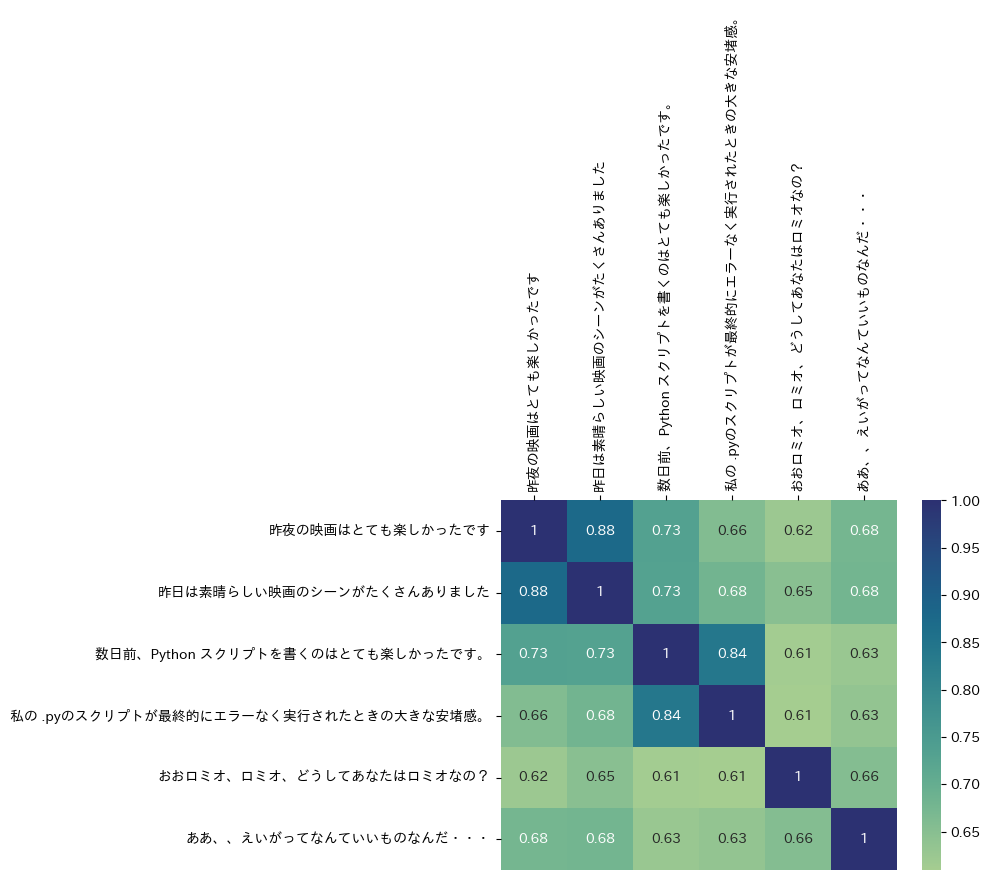

In [26]:
ax = sns.heatmap(df, annot=True, cmap="crest")
ax.xaxis.tick_top()
ax.set_xticklabels(text, rotation=90)

## Code generation with code-bison@001

このノートブックで使用する PaLM API のコード生成モデル (Codey) は code-bison@001 です。 自然言語の指示に従って必要なコードを生成するように微調整されており、次のようなさまざまなコーディング タスクに適しています。

- 書き込み機能
- ライティングクラス
- ウェブページ
- 単体テスト
- ドキュメント文字列
- コード変換、その他多くの使用例。

現在、次の言語をサポートしています。
- C++
- C#
- Go
- GoogleSQL
- Java
- JavaScript
- Kotlin
- PHP
- Python
- Ruby
- Rust
- Scala
- Swift
- TypeScript


詳細については、[こちら](https://cloud.google.com/vertex-ai/docs/generative-ai/code/code-models-overview) をご覧ください。

### Load model

In [27]:
code_generation_model = CodeGenerationModel.from_pretrained("code-bison@001")

### `code-bison@001` のモデルパラメータ

`code-bison@001` の次のパラメーターを使用して、プロンプトに応じて PaLM API コード生成がどのように動作するかをカスタマイズできます。

  - `prefix`: 意味のあるプログラミング コードの一部、または生成されるコードを説明する自然言語プロンプトの始まりを表します。
  - `temperature`: 高いほど、より「創造的な」コード応答を意味します。 範囲: (0.0 ～ 1.0、デフォルトは 0)。
  - `max_output_tokens`: 出力内のトークンの最大数を設定します。 範囲: (1 ～ 2048、デフォルトは 2048)

### Hello Codey

In [28]:
prefix = "二分検索を行うための Python 関数を作成してください"

response = code_generation_model.predict(prefix=prefix)

print(response.text)

```python
def binary_search(list, target):
    # リストの中央値を取得する
    mid = len(list) // 2

    # 中央値が目的の値と等しい場合、その値を返す
    if list[mid] == target:
        return list[mid]

    # 中央値が目的の値よりも小さい場合、左半分のリストに対して二分検索を繰り返す
    if list[mid] < target:
        return binary_search(list[:mid], target)

    # 中央値が目的の値よりも大きい場合、右半分のリストに対して二分検索を繰り返す
    if list[mid] > target:
        return binary_search(list[mid + 1:], target)
```


### Try out your own prompt

いくつかの例：
* テキスト ファイルから IP アドレスを抽出する Go プログラムを作成します
* アドレスからピンコードを抽出できる Java プログラムを作成する
* 文字列からアルファベット以外の文字をすべて削除し、utf-8 にエンコードする標準 SQL 関数を作成します。

In [29]:
prefix = """「calculate_cosine_similairty」という名前の Python 関数と、\
             2 つの引数「vector1」と「vector2」を取る 3 つの単体テストを作成します。\
             次に、numpy dot 関数を使用して 2 つのベクトルの内積を計算します。 \n
          """

response = code_generation_model.predict(prefix=prefix, max_output_tokens=1024)

print(response.text)

```python
import unittest
import numpy as np

def calculate_cosine_similarity(vector1, vector2):

  """Calculates the cosine similarity between two vectors.

  Args:
    vector1: A numpy array of numbers.
    vector2: A numpy array of numbers.

  Returns:
    The cosine similarity between the two vectors.
  """

  # Calculate the dot product of the two vectors.
  dot_product = np.dot(vector1, vector2)

  # Calculate the magnitude of the two vectors.
  magnitude1 = np.linalg.norm(vector1)
  magnitude2 = np.linalg.norm(vector2)

  # Calculate the cosine similarity.
  cosine_similarity = dot_product / (magnitude1 * magnitude2)

  return cosine_similarity


class TestCosineSimilarity(unittest.TestCase):

  def test_cosine_similarity_positive(self):
    """Tests that the cosine similarity is calculated correctly for two
    vectors that are positively correlated.
    """

    vector1 = np.array([1, 2, 3])
    vector2 = np.array([4, 5, 6])

    expected_cosine_similarity = 0.816496580927726


### Prompt templates

プロンプト テンプレートは、再利用できるプロンプトを構成する適切な方法を見つけた場合に役立ちます。 これは、自由形式プロンプトの自由形式を制限するのにも役立ちます。 プロンプト テンプレートを実装するにはさまざまな方法がありますが、以下は f-strings を使用した一例にすぎません。 このようにして、コードの期待される機能に従ってプロンプトを構成できます。

In [ ]:
language = "C++ function"
file_format = "json"
extract_info = "names"
requirments = """
                - 名前は大文字で始める必要があります。
                - 最終リストには重複する名前があってはなりません。
              """

prefix = f"""
            {file_format} を解析し、次の要件を持つ {extract_info} を抽出するための {language} を作成します: {requirments}。
              """

response = code_generation_model.predict(prefix=prefix, max_output_tokens=1024)

print(response.text)

```c++
#include <iostream>
#include <string>
#include <vector>
#include <json/json.h>

using namespace std;

// 関数名: extract_names
// 入力: json オブジェクト
// 出力: 大文字で始まる名前のリスト
vector<string> extract_names(const Json::Value& json) {
  // 名前のリスト
  vector<string> names;

  // json オブジェクトを走査し、各名前を names リストに追加する
  for (const auto& name : json.getMemberNames()) {
    if (name[0] >= 'A' && name[0] <= 'Z') {
      names.push_back(name);
    }
  }

  // 重複を削除する
  names.erase(unique(names.begin(), names.end()), names.end());

  // 結果を返す
  return names;
}

int main() {
  // json オブジェクトを作成
  Json::Value json = {
    {"name", "John Doe"},
    {"age", 30},
    {"address", "123 Main Street"},
  };

  // 名前のリストを取得
  vector<string> names = extract_names(json);

  // 名前のリストを表示
  for (const auto& name : names) {
    cout << name << endl;
  }

  return 0;
}
```


## Code completion with `code-gecko@001`

コード補完では、code-gecko 基盤モデルを使用して、記述されているコードに基づいてコードを生成し、完成させます。 `code-gecko` は、ユーザーが最近入力したコードを完成させます。

コード補完のプロンプトの作成の詳細については、「コード補完のプロンプトを作成する」(https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/code-completion#:~) を参照してください。 :text=code%20completion%2C%20see-,Create%20prompts%20for%20code%20completion,-.)

コード補完 API には、コード生成よりもいくつかのパラメーターが追加されています。

* prefix: *required* : コード モデルの場合、prefix は意味のあるプログラミング コードの一部の始まり、または生成されるコードを説明する自然言語プロンプトを表します。

* suffix: *optional* : コード補完の場合、suffix は意味のあるプログラミング コードの終わりを表します。 モデルは、プレフィックスとサフィックスの間のコードを埋めようとします。

* temperature: *必須* : temperatureは、トークン選択のランダム性の程度を制御します。 他のモデルも同様です。 範囲: (0.0 ～ 1.0、デフォルトは 0)

* maxOutputTokens: *required* : 応答で生成できるトークンの最大数。 **範囲: (1 ～ 64、デフォルトは 64)**

* stopSequences: *オプション* : 応答内でいずれかの文字列が見つかった場合にテキストの生成を停止するようにモデルに指示する文字列のリストを指定します。 文字列では大文字と小文字が区別されます。

In [ ]:
code_completion_model = CodeGenerationModel.from_pretrained("code-gecko@001")

In [ ]:
prefix = """
          def find_x_in_string(string_s, x):
         """

response = code_completion_model.predict(prefix=prefix,
                                         max_output_tokens=64)

print(response.text)

   return string_s.find(x)

          def find_y_in_string(string_s, y):
            return string_s.find(y)


In [ ]:
prefix = """
         def reverse_string(s):
            return s[::-1]
         def test_empty_input_string()
         """

response = code_completion_model.predict(prefix=prefix,
                                         max_output_tokens=64)

print(response.text)

   assert reverse_string("") == ""
         def test_one_character_input_string()
            assert reverse_string("a") == "a"
         def test_two_character_input_string()
            assert reverse_string("ab") == "ba


## Code chat with `codechat-bison@001`

「codechat-bison@001」モデルを使用すると、コード コンテキストから複数のターンにわたってフリーフォームの会話を行うことができます。 アプリケーションは、会話で以前に話された内容を追跡します。 そのため、コード生成のためにアプリケーションで会話を使用する予定がある場合は、複数ターンの会話のユースケース向けに微調整されている「codechat-bison@001」モデルを使用してください。

In [ ]:
code_chat_model = CodeChatModel.from_pretrained("codechat-bison@001")

code_chat = code_chat_model.start_chat()

print(code_chat.send_message(
        "2 つの数値の最小値を計算する関数の作成を手伝ってください。",
    )
)

以下の関数は、2つの数値の最小値を計算します。

```
def min(x, y):
  """
  2つの数値の最小値を計算します。

  Args:
    x: 最初の数値
    y: 2番目の数値

  Returns:
    2つの数値のうち最小の数値
  """

  if x < y:
    return x
  else:
    return y
```

この関数は、2つの数値を比較して、小さい方の数値を返します。例えば、2つの数値が3と5の場合、この関数は3を返します。


As shown below, the model should respond based on what was previously asked in the conversation:

In [ ]:
print(code_chat.send_message(
        "コードを行ごとに箇条書きで説明してもらえますか?",
    )
)

* `def min(x, y):` は、2つの数値の最小値を計算する関数です。
* `Args:` は、関数に渡される引数を定義します。この関数では、2つの数値を渡す必要があります。
* `x:` は、最初の数値です。
* `y:` は、2番目の数値です。
* `Returns:` は、関数が返す値を定義します。この関数では、2つの数値のうち最小の数値を返します。
* `if x < y:` は、最初の数値が2番目の数値よりも小さいかどうかを判定する条件文です。
* `return x:` は、最初の数値が2番目の数値よりも小さい場合は、最初の数値を返します。
* `else:` は、最初の数値が2番目の数値よりも小さくない場合に実行されるブロックです。
* `return y:` は、最初の数値が2番目の数値よりも小さくない場合は、2番目の数値を返します。


You can take another example and ask the model to give more general code suggestion for a specific problem that you are working on.

In [ ]:
code_chat = code_chat_model.start_chat()

print(code_chat.send_message(
        "Pythonでリストを走査する最もスケーラブルな方法は何ですか?",
    )
)

リストを走査する最もスケーラブルな方法は、forループを使用することです。forループは、リストの要素を1つずつ順番に処理します。リストの要素が非常に多い場合は、forループは効率的ではありません。リストの要素が非常に多い場合は、リストをイテレーターとして使用することを検討してください。イテレーターは、リストの要素を1つずつ順番に処理するオブジェクトです。イテレーターは、リストの要素が非常に多い場合に効率的です。


You can continue to ask follow-up questions to the origianl query.

In [ ]:
print(code_chat.send_message(
        "次のコードの 1 秒あたりの反復を測定するにはどうすればよいですか?",
    )
)

次のコードの1秒あたりの反復を測定する方法は次のとおりです。

1. コードを実行する前に、システムクロックの値を取得します。
2. コードを実行します。
3. コードの実行が完了したら、システムクロックの値を再度取得します。
4. 2番目のシステムクロック値から1番目のシステムクロック値を差し引きます。
5. 結果を1秒で割ります。

この方法では、コードの実行にかかる時間をミリ秒単位で測定できます。
